In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [2]:
customer_data = pd.read_csv(r'C:\Users\User\Desktop\Gamboo (1)\Customers\Customers.txt')

In [3]:
customer_data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
columns = customer_data.columns[3:]

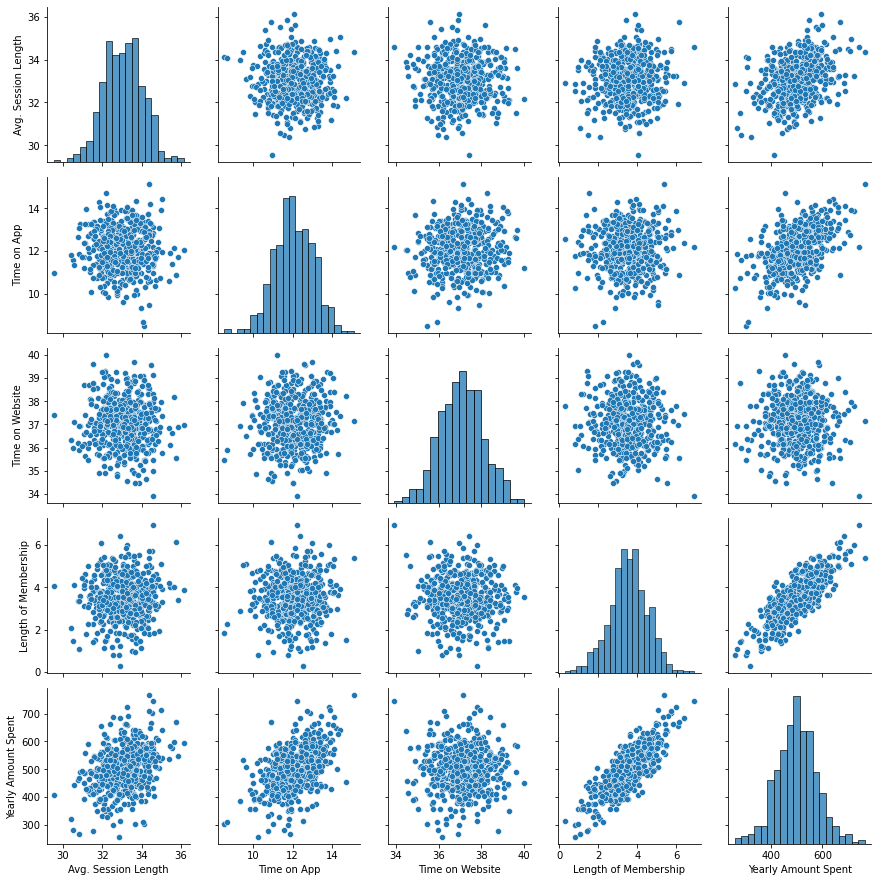

In [5]:
g = sns.PairGrid(customer_data[columns])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<AxesSubplot:>

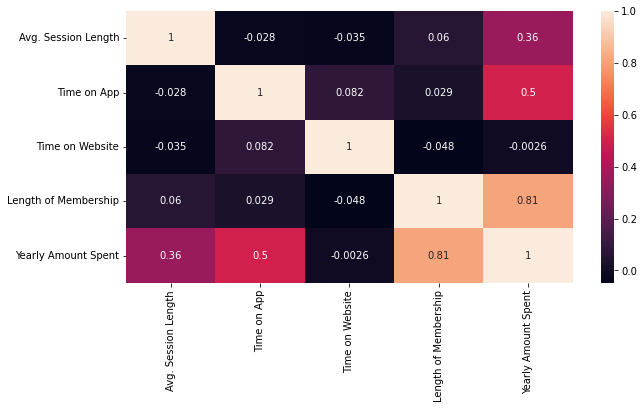

In [6]:
plt.figure(figsize = (10,5))
sns.heatmap(customer_data.corr() , annot  = True)

In [7]:
customer_data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
X = customer_data[columns].drop(columns = ['Yearly Amount Spent'])
Y = customer_data['Yearly Amount Spent']

In [9]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y  )

# LinearRegression

In [10]:
lin = LinearRegression()
lin.fit(X_train , Y_train)

LinearRegression()

In [11]:
lin_pred = lin.predict(X_test)

In [12]:
r2_score(lin_pred , Y_test)

0.9838589703840689

# RandomRegression

In [13]:
ran = RandomForestRegressor(warm_start= True)
ran.fit(X_train , Y_train)
ran_pred = ran.predict(X_test)

In [14]:
r2_score(ran_pred , Y_test)

0.9323200948659501

# DecissionTree

In [15]:
dec = DecisionTreeRegressor()

In [16]:
dec.fit(X_train , Y_train)

DecisionTreeRegressor()

In [17]:
dec_pred = dec.predict(X_test)

In [18]:
r2_score(dec_pred , Y_test)

0.893398540878252

# Lasso

In [19]:
lasso = Lasso(alpha = 0.1 , max_iter=500)

In [20]:
lasso.fit(X_train , Y_train)

Lasso(alpha=0.1, max_iter=500)

In [21]:
lasso_pred = lasso.predict(X_test)

In [22]:
r2_score(lasso_pred , Y_test)

0.9838603950996461

In [23]:
lin = LinearRegression()
lin.fit(X , Y)

LinearRegression()

In [25]:
lass_pred22 = lasso.predict(X)

In [31]:
cus_pred = X

In [32]:
cus_pred['Predict'] = lass_pred22

In [34]:
cus_pred['Yearly Amount Spent'] = Y

In [35]:
cus_pred

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Predict,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,594.305416,587.951054
1,31.926272,11.109461,37.268959,2.664034,379.572385,392.204933
2,33.000915,11.330278,37.110597,4.104543,504.500255,487.547505
3,34.305557,13.717514,36.721283,3.120179,571.004915,581.852344
4,33.330673,12.795189,37.536653,4.446308,591.339368,599.406092
...,...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,575.788740,573.847438
496,34.702529,11.695736,37.190268,3.576526,530.504047,529.049004
497,32.646777,11.499409,38.332576,4.958264,554.636552,551.620145
498,33.322501,12.391423,36.840086,2.336485,445.627302,456.469510


Text(0, 0.5, 'Yearly Amount Spent')

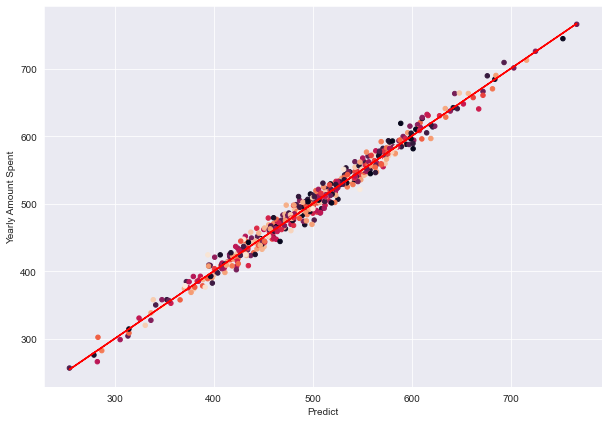

In [43]:
plt.figure(figsize = (10 , 7))
sns.set_style('darkgrid')
n = np.random.rand(500)
plt.scatter(cus_pred['Predict'] , cus_pred['Yearly Amount Spent'] , c = n , s = 20)
plt.plot(cus_pred['Predict'] , cus_pred['Predict'] , color = 'red')
plt.xlabel('Predict')
plt.ylabel('Yearly Amount Spent')